<a href="https://colab.research.google.com/github/Crisben93/Clasificador/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Tarea Redes Neuronales Convolucionales 2**
##**Presentado por:** Christian Camilo Benavides

#**Librerias**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import datasets,layers,models

import matplotlib.pyplot as plt

from google.colab import files

import zipfile
import io

import cv2
import numpy as np
import os


In [ ]:
uploaded = files.upload() # Cargamos el archivo .zip con las imagenes de entrenamiento y testeo

Saving 64x64_SIGNS.zip to 64x64_SIGNS.zip


In [ ]:
data = zipfile.ZipFile(io.BytesIO(uploaded['64x64_SIGNS.zip']),'r')
data.extractall() # Leemos y extraemos el archivo

In [ ]:
train_signs = '/content/64x64_SIGNS/train_signs' # Rutas de los archivos
test_signs = '/content/64x64_SIGNS/test_signs'
 
signs_training = [] # Dataset de entrenamiento
signs_testing = [] # Dataset de testeo

# Ciclos for para incluir la informacion de cada imagen a los datasets
for img in os.listdir(train_signs): 
  img = cv2.imread(os.path.join(train_signs,img))
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  signs_training.append([img])

print(len(signs_training))
signs_training = np.squeeze(signs_training[0:864])

for img2 in os.listdir(test_signs):
  img2 = cv2.imread(os.path.join(test_signs,img2))
  img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
  signs_testing.append([img2])

print(len(signs_testing))
signs_testing = np.squeeze(signs_testing[0:120])


864
120


In [ ]:
categories = [] #Etiquetas - Labels

for img_filename in os.listdir(train_signs): # Hacemos este ciclo for para eliminar a cada nombre de cada archivo la parte innecesaria y solo dejar el numero a cual corresponde la imagen
    if img_filename.endswith(".jpg"):
        category = img_filename.split('_IMG')[0]
        categories.append(category)

categories = np.array(categories) # Convertimos la lista obtenida a un arreglo
categories = categories[:].astype(int) # Convertimos las variable a tipo int

#indice = 88
class_names = ['Cero','Uno','Dos','Tres','Cuatro','Cinco'] # Aqui nombranos cada categoria
#plt.imshow(signs_training[indice,:,:,:])
#plt.title(class_names[categories[indice]])

In [ ]:
categories2 = [] #Etiquetas - Labels

for img_filename2 in os.listdir(test_signs): # Hacemos este ciclo for para eliminar a cada nombre de cada archivo la parte innecesaria y solo dejar el numero a cual corresponde la imagen
    if img_filename2.endswith(".jpg"):
        category2 = img_filename2.split('_IMG')[0]
        categories2.append(category2)

categories2 = np.array(categories2) # Convertimos la lista obtenida a un arreglo
categories2 = categories2[:].astype(int) # Convertimos las variable a tipo int

#indice = 88
class_names2 = ['Cero','Uno','Dos','Tres','Cuatro','Cinco'] # Aqui nombranos cada categoria
#plt.imshow(signs_training[indice,:,:,:])
#plt.title(class_names[categories[indice]])

In [ ]:
print(signs_training.shape)
print(signs_testing.shape)

(864, 64, 64, 3)
(120, 64, 64, 3)


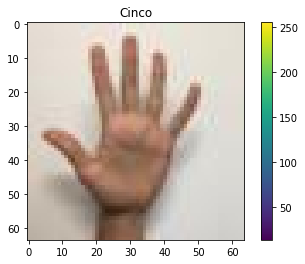

In [ ]:
plt.figure()
plt.imshow(signs_training[333])
plt.title(class_names[categories[333]])
plt.colorbar()
plt.grid(False)
plt.show()

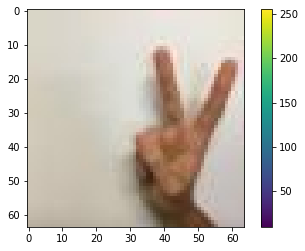

In [ ]:
plt.figure()
plt.imshow(signs_testing[5])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
signs_training = signs_training/255 # cada pixel ahora tiene un valor entre 0 y 1
signs_testing = signs_testing/255

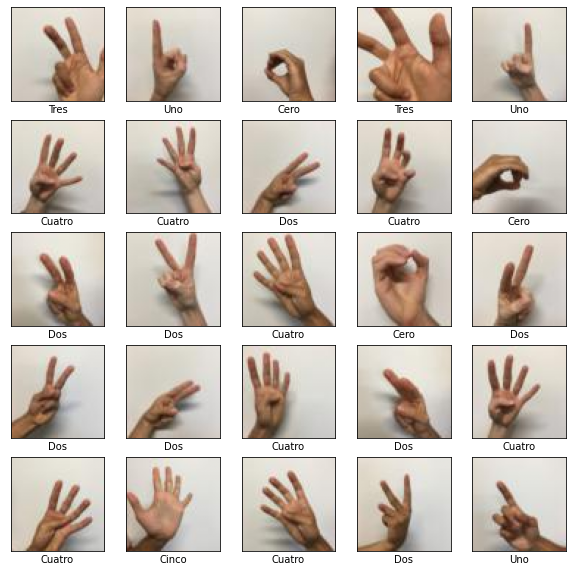

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(signs_training[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[categories[i]])
plt.show()

#Red Neuronal

In [ ]:
model = models.Sequential()

In [ ]:
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu', input_shape=(64,64,3),))
model.add(layers.MaxPool2D((2,2)))

In [ ]:
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))

In [ ]:
model.add(layers.Flatten())

In [ ]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 12, 12, 64)        36928     
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 2304)             

In [ ]:
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(6))


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history = model.fit(signs_training,categories,epochs=10)

Epoch 1/10
27/27 [==============================] - 1s 6ms/step - loss: 1.8134 - accuracy: 0.1601
Epoch 2/10
27/27 [==============================] - 0s 5ms/step - loss: 1.6178 - accuracy: 0.4009
Epoch 3/10
27/27 [==============================] - 0s 5ms/step - loss: 1.2504 - accuracy: 0.5228
Epoch 4/10
27/27 [==============================] - 0s 5ms/step - loss: 0.8873 - accuracy: 0.6868
Epoch 5/10
27/27 [==============================] - 0s 4ms/step - loss: 0.6570 - accuracy: 0.7769
Epoch 6/10
27/27 [==============================] - 0s 5ms/step - loss: 0.4691 - accuracy: 0.8329
Epoch 7/10
27/27 [==============================] - 0s 5ms/step - loss: 0.3997 - accuracy: 0.8604
Epoch 8/10
27/27 [==============================] - 0s 5ms/step - loss: 0.3458 - accuracy: 0.8896
Epoch 9/10
27/27 [==============================] - 0s 5ms/step - loss: 0.2505 - accuracy: 0.9273
Epoch 10/10
27/27 [==============================] - 0s 4ms/step - loss: 0.1722 - accuracy: 0.9470


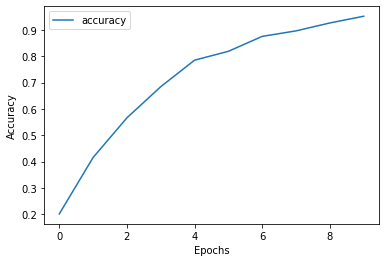

In [ ]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#Validación

(64, 64, 3)
(1, 64, 64, 3)


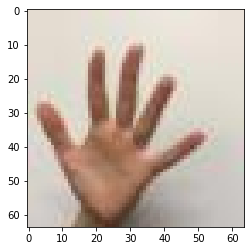

[[ -6.902034  -13.289759  -12.351821    3.8407307   4.2526064  12.045539 ]]
-12.4047365
5
Cinco


In [ ]:
x = 77
img = signs_testing[x]
print(img.shape)
img = (np.expand_dims(img,0))
print(img.shape)

plt.figure()
plt.imshow(signs_testing[x])
plt.grid(False)
plt.show()

predictions_single = model.predict(img)
print(predictions_single)
print(np.sum(predictions_single))
print(np.argmax(predictions_single))
print(class_names[np.argmax(predictions_single)])

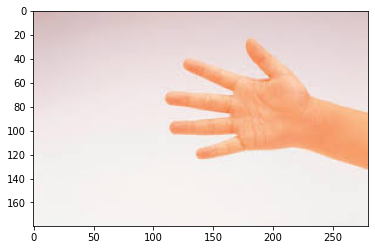

(64, 64, 3)
(1, 64, 64, 3)
[[   30.519306  -210.79454    -55.397617 -1458.5449    -121.08754
    710.7678  ]]
-1104.5375
5
Cinco


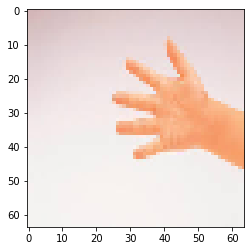

In [ ]:
imgag = cv2.imread('prueba4.jpg')
img_cvt = cv2.cvtColor(imgag, cv2.COLOR_BGR2RGB)
plt.imshow(img_cvt)
plt.show()

img_size = 64
img22 = img_cvt
img22 = cv2.resize(img22,(img_size,img_size))
plt.imshow(img22)
print(img22.shape)
img22 = (np.expand_dims(img22,0))
print(img22.shape)

predictions_single = model.predict(img22)
print(predictions_single)
print(np.sum(predictions_single))
print(np.argmax(predictions_single))
print(class_names[np.argmax(predictions_single)])



In [ ]:
test_eval = model.evaluate(signs_testing,categories2)

print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

4/4 [==============================] - 0s 4ms/step - loss: 0.3264 - accuracy: 0.8833
Test loss: 0.3263818621635437
Test accuracy: 0.8833333253860474


In [ ]:
model.save('model.h5')